# z-Test

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns
import statistics as st
import pylab
import sklearn as sk
import matplotlib as mpl
import statsmodels.stats.weightstats as wstats
from scipy.stats import sem
from math import sqrt 
from scipy.stats import norm
from sklearn import preprocessing
from statsmodels.stats.weightstats import ztest

## The Story

In [2]:
print("In the population, we'd expect Days to have a mean of 23 and standard deviation of 5, but you want to know if your sample comes from a different population.")

In the population, we'd expect Days to have a mean of 23 and standard deviation of 5, but you want to know if your sample comes from a different population.


### Question

In [3]:
print("Does our sample come from a population with a mean equal to 23, assuming a population standard deviation of 5?")

Does our sample come from a population with a mean equal to 23, assuming a population standard deviation of 5?


### Answer

In [4]:
#Sample Size
n=1
while (n <= 6 and n > 0) :
    n = int(input ("Enter sample size :\nType a number between 1 and 6\n1.\tn=10\n2.\tn=20\n3.\tn=30\n4.\tn=50\n5.\tn=100\n6.\tn=200\n"))
    if n <= 6 and n > 0 :
        if n==1 :
            print("Sample size = 10")
            n=10
        elif n==2:
            print("Sample size = 20")
            n=20
        elif n==3:
            print("Sample size = 30")
            n=30
        elif n==4:
            print("Sample size = 50")
            n=50
        elif n==5:
            print("Sample size = 100")
            n=100
        elif n==6:
            print("Sample size = 200")
            n=200
        exitn=1
        break
    else :
        n==-1
        print("Wrong Number, re-run the code again and type a number between 1 and 6 and re-run the code again by clicking:\nKernel>Restart\nNo sample size chosen")
#Statistical Significance
alpha=0.05
while (alpha <  1 and alpha > 0) :
    alpha = float(input ("Enter Statistical Significance :\nType a number between 0 and 1, but not 0 nor 1\n"))
    if alpha <  1 and alpha > 0 :
        print("α = ",alpha)
        exita=1
        break
    else :
        alpha==-1
        print("Wrong Number, re-run the code again and type a number between 0 and 0 and re-run the code again by clicking:\nKernel>Restart\nNo Level of Statistical Significance chosen")
if exitn==1 and exita==1:
    print("Sample Size :",n,"\nStatistical Significance:",alpha)

Enter sample size :
Type a number between 1 and 6
1.	n=10
2.	n=20
3.	n=30
4.	n=50
5.	n=100
6.	n=200
6
Sample size = 200
Enter Statistical Significance :
Type a number between 0 and 1, but not 0 nor 1
0.01
α =  0.01
Sample Size : 200 
Statistical Significance: 0.01


In [5]:
if n==10 :
    dt = pd.read_csv('z_test n=10.csv',dtype=int)
elif n==20:
    dt = pd.read_csv('z_test n=20.csv',dtype=int)
elif n==30:
    dt = pd.read_csv('z_test n=30.csv',dtype=int)
elif n==50:
    dt = pd.read_csv('z_test n=50.csv',dtype=int)
elif n==100:
    dt = pd.read_csv('z_test n=100.csv',dtype=int)
else:
    dt = pd.read_csv('z_test n=200.csv',dtype=int)

#### Descriptive Statistics

In [19]:
n=len(dt)
sum=dt.sum()

mlst=np.arange(0, 5, 1)
dt2=dt**2 #2nd Moment of X
sum2=dt2.sum()
dt3=dt**3 #3rd Moment of X
sum3=dt3.sum()
dt4=dt**4 #4th Moment of X
sum4=dt4.sum()

mean=dt.mean()
median=dt.median()
mode=dt.mode()
iqr=dt.quantile(0.75)-dt.quantile(0.25)
max=dt.max()
min=dt.min()
range=max-min
var=round(dt.var(),2)
sd=round(dt.std(),2)

print("Central Tendency Calculations \n===============================\n===============================")

print("n:",n)
print("Sum:",sum[0],"\n===============================")
print(mlst[2],"nd - Moment Sum:",sum2[0])
print(mlst[3],"rd - Moment: Sum",sum3[0])
print(mlst[4],"th - Moment: Sum",sum4[0],"\n===============================")


print("Mean:",mean[0])
print("Median:",median[0],"\n===============================")
print("Mode:\n==============================="),mode.to_string()
print("Max:",max[0],)
print("Min:",min[0],)
print("Range:",range[0],"\n===============================")


print("Variance:",var[0])
print("Standard Deviation:",sd[0],"\n===============================")

print("Quantiles:\n",dt.quantile(q=(0.25,0.50,0.75)),"\n===============================")
print("IQR:",iqr[0],"\n===============================")

print("*******************************************************************************************************************************\nNote:\n-----\nThe 2nd Moment Sum is the Σ(x^2),etc...\n*******************************************************************************************************************************")


Central Tendency Calculations 
n: 200
Sum: 4955 
2 nd - Moment Sum: 128061
3 rd - Moment: Sum 3435101
4 th - Moment: Sum 95256105 
Mean: 24.775
Median: 25.0 
Mode:
Max: 39
Min: 11
Range: 28 
Variance: 26.64
Standard Deviation: 5.16 
Quantiles:
       Days
0.25  21.0
0.50  25.0
0.75  28.0 
IQR: 7.0 
*******************************************************************************************************************************
Note:
-----
The 2nd Moment Sum is the Σ(x^2),etc...
*******************************************************************************************************************************


In [14]:
z = np.array(dt['Days'])
z=((np.mean(z)-z)/np.std(z))

zsum=z.sum()
mlst=np.arange(0, 5, 1)
z2=z**2 #2nd Moment of X
zsum2=z2.sum()
z3=z**3 #3rd Moment of X
zsum3=z3.sum()
z4=z**4 #4th Moment of X
zsum4=z4.sum()

zmean=z.mean()
zmedian=round(np.median(z),4)
ziqr=np.quantile(z,q=0.75)-np.quantile(z,q=0.25)
zmax=np.max(z)
zmin=np.min(z)
zrange=max-min
zvar=round(np.var(z),2)
zsd=round(np.std(z),2)

print("Central Tendency Calculations \n===============================\n===============================")

print("n:",n)
print("Sum:",np.round(zsum,2),"\n===============================")
print(mlst[2],"nd - Moment Sum:",np.round(zsum2,2))
print(mlst[3],"rd - Moment: Sum",np.round(zsum3,2))
print(mlst[4],"th - Moment: Sum",np.round(zsum4,2),"\n===============================")


print("Mean:",zmean)
print("Median:",np.round(zmedian,4),"\n===============================")
print("Mode:\n==============================="),mode.to_string()
print("Max:",np.round(zmax,2),)
print("Min:",np.round(zmin,2),)
print("Range:",np.round(zmax-zmin,2),"\n===============================")


print("Variance:",zvar)
print("Standard Deviation:",zsd,"\n===============================")

print("Quantiles:\n",np.quantile(z,q=(0.25,0.50,0.75)),"\n===============================")
print("IQR:",np.round(ziqr,2),"\n===============================")

print("*******************************************************************************************************************************\nNote:\n-----\nThe 2nd Moment Sum is the Σ(z^2),etc...\n*******************************************************************************************************************************")


Central Tendency Calculations 
n: 200
Sum: -0.0 
2 nd - Moment Sum: 200.0
3 rd - Moment: Sum 1.97
4 th - Moment: Sum 584.22 
Mean: -2.4424906541753446e-16
Median: -0.0437 
Mode:
Max: 2.68
Min: -2.76
Range: 5.44 
Variance: 1.0
Standard Deviation: 1.0 
Quantiles:
 [-0.62642767 -0.04370426  0.7332603 ] 
IQR: 1.36 
*******************************************************************************************************************************
Note:
-----
The 2nd Moment Sum is the Σ(z^2),etc...
*******************************************************************************************************************************


#### Graphs

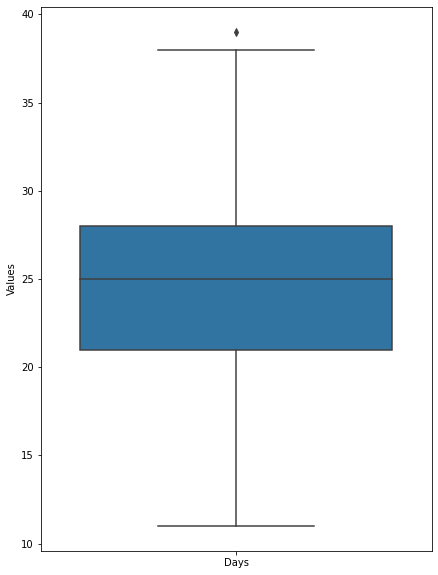

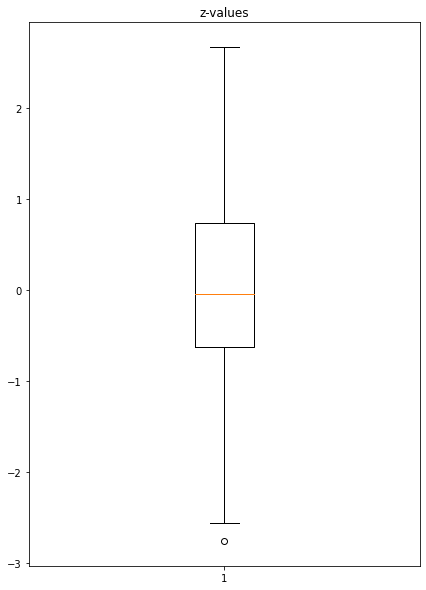

In [74]:
# Boxplot X
fig, ax = plt.subplots(figsize=(7,10)) #Setting size of the canvas

sns.boxplot(x='variable', y='value', data=pd.melt(dt)).set(
            xlabel='', #define the variable's nature
            ylabel='Values')
# Boxplot Z
fig, ax1 = plt.subplots(figsize=(7,10)) #Setting size of the canvas

ax1.set_title('z-values')
ax1.boxplot(z)
plt.show()

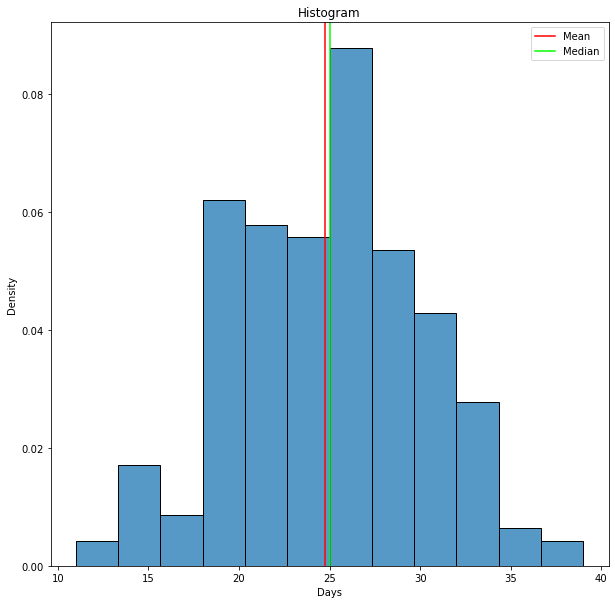

In [154]:
mean=dt.mean()
median=dt.median()
mode=dt.mode()

fig, ax = plt.subplots(figsize=(10,10)) #Setting size of the canvas
sns.histplot(dt['Days'],stat="density")

plt.title("Histogram")



plt.axvline(x=mean[0], color="red", label="Mean") 
plt.axvline(median[0], color="lime", label="Median")
#plt.axvline(mode[0],color="r",label="Mode1")
#plt.axvline(mode[1],color="r",label="Mode2")
plt.legend()
plt.show()


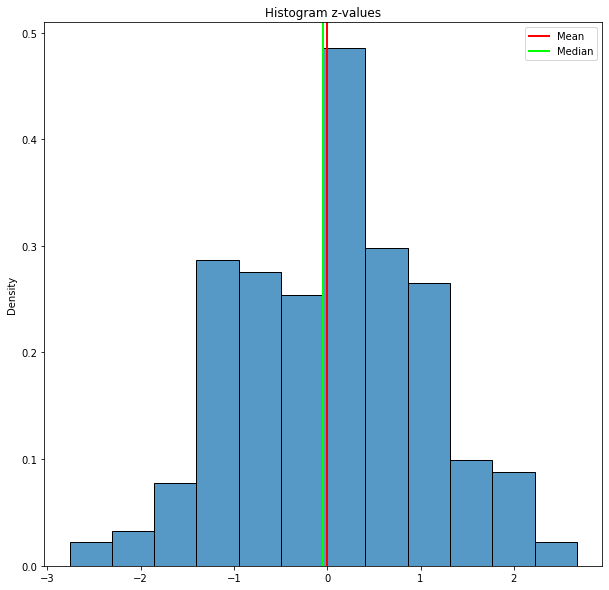

In [149]:

fig, ax = plt.subplots(figsize=(10,10)) #Setting size of the canvas
sns.histplot(z,stat="density")

plt.title("Histogram z-values")



plt.axvline(x=zmean, color="red", label="Mean",linewidth=2) 
plt.axvline(zmedian, color="lime", label="Median",linewidth=2)
#plt.axvline(mode[0],color="r",label="Mode1")
#plt.axvline(mode[1],color="r",label="Mode2")
plt.legend()
plt.show()


#### Statistical Tests for Normality

In [29]:
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chisquare
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import jarque_bera
import statsmodels.api as sm

In [155]:
print("Statistical Tests for Normality")
print("===============================================================================================================================")
print("\t\tShapiro-Wilk\tKolmogorov-Smirnov\tLilliefors\tChi-Square\tD’Agostino’s K-squared")
print("===============================================================================================================================")
data = dt
statistic1,pvalue1 = shapiro(data)
statistic2,pvalue2 = kstest(data,'norm')
statistic3,pvalue3 = lilliefors(data)
statistic4,pvalue4 = chisquare(data)
statistic5,pvalue5 = normaltest(data)
print('Statistic |\t%.4f'% statistic1,"\t\t",statistic2,"\t\t\t",np.round(statistic3,2),"\t\t",np.round(statistic4,2),"\t",np.round(statistic5,4))
print('df        |\t%.1i'% (n),"\t\t",(n),"\t\t\t",(n),"\t\t",(n),"\t\t",(n))
print('p-value   |\t%.4f'% (pvalue1),"\t\t",(pvalue2),"\t\t\t",np.round(pvalue3,4),"\t",np.round(pvalue4,4),"\t",np.round(pvalue5,4))
print("===============================================================================================================================")
print('Result    |\tAccept\t\tReject\t\t\tAccept\t\t Accept\t\t Accept\t\t')
print("===============================================================================================================================")


Statistical Tests for Normality
		Shapiro-Wilk	Kolmogorov-Smirnov	Lilliefors	Chi-Square	D’Agostino’s K-squared
Statistic |	0.9939 		 1.0 			 0.05 		 [213.96] 	 [0.0035]
df        |	200 		 200 			 200 		 200 		 200
p-value   |	0.5794 		 0.0 			 0.1691 	 [0.2221] 	 [0.9983]
Result    |	Accept		Reject			Accept		 Accept		 Accept		


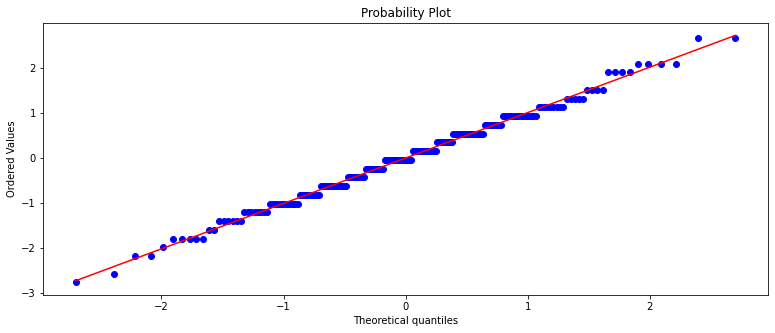

In [35]:
fig, ax = plt.subplots(figsize=(13,5)) #Setting size of the canvas

stats.probplot(z, dist="norm", plot= pylab)
pylab.show()

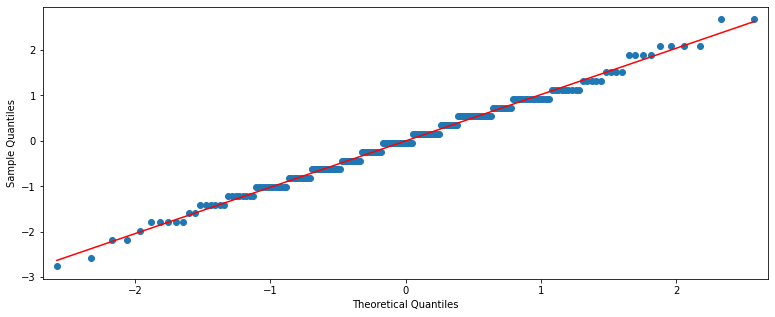

In [36]:
from statsmodels.graphics.gofplots import qqplot_2samples
mpl.rc("figure", figsize=(13,5))

sm.qqplot(z, line='r')
pylab.show()

### Testing Hypothesis

In [37]:
mu=23
sigma=5
print("Test Hypothesis")
print('===============================')
print("H0: μ = 23\nH1: μ ≠ 23")
print('===============================')
print("Sum of X =",sum[0])
print("Mean of X =",mean[0])
print("Population Mean (Given) = ",mu)
print("Population Standard Deviation (Given) =", sigma)

zobs=wstats.ztest(dt, value=mu)
obzstat=np.round(zobs[0],4)
pv=np.round(zobs[1],4)
print('===============================')
print("Population Standard Error (using σ) =",np.round(sigma/sqrt(n),4))
print("Critical z-statistic = ±",np.round(norm.ppf(1-(alpha/2)),2))
print("Observed z-statistic =", obzstat)
print('===============================')

LB=np.round(mean[0]-(norm.ppf(1-(alpha/2)*(sigma/sqrt(n)))),2)
UB=np.round(mean[0]+(norm.ppf(1-(alpha/2)*(sigma/sqrt(n)))),2)
print("p-value =",np.round(zobs[1],4))
print('===============================')
print("Lower Bound = ",np.round(mean[0]-(norm.ppf(1-(alpha/2)*(sigma/sqrt(n)))),2))
print("Upper Bound = ",np.round(mean[0]+(norm.ppf(1-(alpha/2)*(sigma/sqrt(n)))),2))
print('===============================')
print()



Test Hypothesis
H0: μ = 23
H1: μ ≠ 23
Sum of X = 4955
Mean of X = 24.775
Population Mean (Given) =  23
Population Standard Deviation (Given) = 5
Population Standard Error (using σ) = 0.3536
Critical z-statistic = ± 2.58
Observed z-statistic = [4.8637]
p-value = [0.]
Lower Bound =  21.86
Upper Bound =  27.69



#### Results

In [38]:
print("-----------------------------------------")
print(": Results :")
if(pv < alpha ):
    print("-----------------------------------------")
    print()
    print("Reject the null hypothesis")
    print("Accept the alternative.") 
    print("The difference is statistically significant.") 
    print("The sample is not drawn from a population with a mean of",mu)
    print("If we assume this sample to represent the population, we would expect",100*(1-alpha),"% of sample means to fall between:\n")    
    print("[",LB,",",UB,"]\n")
    print("The difference between the sample mean and population mean was small.")
    print()  
    print("-----------------------------------------")
    print("p-Value =",pv, "<" , alpha , "= α")
    print("-----------------------------------------")
else:
    print("-----------------------------------------")
    print("Reject the null hypothesis")
    print("Remain the null.") 
    print("The difference is statistically NOT statistically significant.") 
    print("The sample is drawn from a population with a mean higher or equal to",mu)
    print("If we assume this sample to represent the population, we would expect",100*(1-alpha),"% of sample means to fall between:\n")    
    print("[",LB,",",UB,"]\n")

    
    print("-----------------------------------------")
    print("p-Value =",pv, ">" , alpha , "= α")
    print("-----------------------------------------")

-----------------------------------------
: Results :
-----------------------------------------

Reject the null hypothesis
Accept the alternative.
The difference is statistically significant.
The sample is not drawn from a population with a mean of 23
If we assume this sample to represent the population, we would expect 99.0 % of sample means to fall between:

[ 21.86 , 27.69 ]

The difference between the sample mean and population mean was small.

-----------------------------------------
p-Value = [0.] < 0.01 = α
-----------------------------------------
